In [1]:
import numpy as np
import matplotlib.pyplot as plt  
from scipy.optimize import minimize

from IPython.display import clear_output

import time
import os

In [2]:
if not os.path.isdir('./figure/tanhTopology1C/'):
    os.makedirs('./figure/tanhTopology1C/')
figure_dir = './figure/tanhTopology1C/'

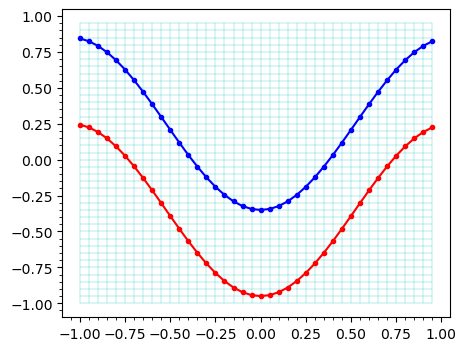

In [3]:
X,Y =np.meshgrid(np.arange(-1,1,0.05),np.arange(-1,1,0.05))
n = X.shape[1]

x = np.arange(-1, 1, 0.05)
y1 = -0.6*np.sin(3*x+np.pi/2)-0.35
y2 = -0.6*np.sin(3*x+np.pi/2)+0.25

plt.figure(figsize=(5,4))
plt.minorticks_on()
for i in np.arange(n):
    plt.plot(X[i,:], Y[i,:], 'c-', linewidth=0.2)
    plt.plot(X[:,i], Y[:,i], 'c-', linewidth=0.2)

plt.plot(x, y1, 'r.-')
plt.plot(x, y2, 'b.-')

In [4]:
w11 = np.array([-3, -0.5,  0.5, 3]) # can be changed to any values
w12 = np.array([-3, -0.5,  0.5, 3]) # can be changed to any values
w21 = np.array([-3, -0.5,  0.5, 3]) # can be changed to any values
w22 = np.array([-3, -0.5,  0.5, 3]) # can be changed to any values
b1 = np.array([-1, 1.0]) # can be changed to any values
b2 = np.array([-1, 1.0]) # can be changed to any values
m1 = len(w11)
m2 = len(b1)

plt.figure(figsize=(5,4))

counter = 0
for i1 in np.arange(m2):
    for i2 in np.arange(m2):
        for j1 in np.arange(m1):
            for j2 in np.arange(m1):
                for j3 in np.arange(m1):
                    for j4 in np.arange(m1):
                        
                        if (j1 == j2) | (j2 == j3) | (j3 == j4) | (j1 == j3) | (j1 == j4) | (j2 ==j4):
                            
                            counter = counter + 1

                            # tanh
                            # xHat = np.tanh(w11[j1]*X + w21[j2]*Y + b1[i1])
                            # yHat = np.tanh(w12[j3]*X + w22[j4]*Y + b2[i2])

                            # sigmoid
                            # xHat = 1 / (1 + np.exp(-(w11[j1]*X + w21[j2]*Y + b1[i1])))
                            # yHat = 1 / (1 + np.exp(-(w12[j3]*X + w22[j4]*Y + b2[i2])))

                            # ReLU
                            xHat = np.maximum(0, w11[j1]*X + w21[j2]*Y + b1[i1])
                            yHat = np.maximum(0, w12[j3]*X + w22[j4]*Y + b2[i2])

                            # Leaky ReLU
                            # alpha = 0.01
                            # xHat = np.where(w11[j1]*X + w21[j2]*Y + b1[i1] > 0,
                            #                 w11[j1]*X + w21[j2]*Y + b1[i1],
                            #                 alpha * (w11[j1]*X + w21[j2]*Y + b1[i1]))
                            #
                            # yHat = np.where(w12[j3]*X + w22[j4]*Y + b2[i2] > 0,
                            #                 w12[j3]*X + w22[j4]*Y + b2[i2],
                            #                 alpha * (w12[j3]*X + w22[j4]*Y + b2[i2]))

                                                    
                            for i in np.arange(n):
                                plt.plot(X[i,:], Y[i,:], 'c-', linewidth=0.2)
                                plt.plot(X[:,i], Y[:,i], 'c-', linewidth=0.2)

                            for i in np.arange(n):
                                plt.plot(xHat[i,:], yHat[i,:], 'g.-', linewidth=0.2, markersize=0.5)
                                plt.plot(xHat[:,i], yHat[:,i], 'g.-', linewidth=0.2, markersize=0.5)

                            # tanh
                            # x1Hat = np.tanh(w11[j1]*x + w21[j2]*y1 + b1[i1])
                            # y1Hat = np.tanh(w12[j3]*x + w22[j4]*y1 + b2[i2])
                            #
                            # x2Hat = np.tanh(w11[j1]*x + w21[j2]*y2 + b1[i1])
                            # y2Hat = np.tanh(w12[j3]*x + w22[j4]*y2 + b2[i2])

                            # sigmoid
                            # x1Hat = 1 / (1 + np.exp(-(w11[j1]*x + w21[j2]*y1 + b1[i1])))
                            # y1Hat = 1 / (1 + np.exp(-(w12[j3]*x + w22[j4]*y1 + b2[i2])))
                            #
                            # x2Hat = 1 / (1 + np.exp(-(w11[j1]*x + w21[j2]*y2 + b1[i1])))
                            # y2Hat = 1 / (1 + np.exp(-(w12[j3]*x + w22[j4]*y2 + b2[i2])))

                            # ReLU
                            x1Hat = np.maximum(0, w11[j1]*x + w21[j2]*y1 + b1[i1])
                            y1Hat = np.maximum(0, w12[j3]*x + w22[j4]*y1 + b2[i2])

                            x2Hat = np.maximum(0, w11[j1]*x + w21[j2]*y2 + b1[i1])
                            y2Hat = np.maximum(0, w12[j3]*x + w22[j4]*y2 + b2[i2])

                            # Leaky ReLU
                            # alpha = 0.01
                            #
                            # x1_input = w11[j1]*x + w21[j2]*y1 + b1[i1]
                            # y1_input = w12[j3]*x + w22[j4]*y1 + b2[i2]
                            # x2_input = w11[j1]*x + w21[j2]*y2 + b1[i1]
                            # y2_input = w12[j3]*x + w22[j4]*y2 + b2[i2]
                            #
                            # x1Hat = np.where(x1_input > 0, x1_input, alpha * x1_input)
                            # y1Hat = np.where(y1_input > 0, y1_input, alpha * y1_input)
                            #
                            # x2Hat = np.where(x2_input > 0, x2_input, alpha * x2_input)
                            # y2Hat = np.where(y2_input > 0, y2_input, alpha * y2_input)



                            clear_output(wait=True)
                                                       
                            plt.plot(x1Hat, y1Hat, 'b.-')
                            plt.plot(x2Hat, y2Hat, 'r.-')

                            #plt.savefig(figure_dir + 'manifolds_'+ str(counter)+'.png')
                            plt.show()
                            #plt.close()

KeyboardInterrupt: 